<a href="https://colab.research.google.com/github/ProsperOmeh/Data_science_Nigeria/blob/master/DL_TRACK_DSN_MODEL_QUIZ_1_BY_Omeh_Chukwuemeka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD, Adam,RMSprop
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(1671)
%matplotlib inline

Using TensorFlow backend.


Hidden1 = 300
Hidden2 = 500
Hidden3 = 100
Output neuron = 10
Optimizer = Adam Optimizer
Loss = Categorical cross entropy.

In [2]:
#let define our variables
N_EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 #That is number of outputs
OPTIMIZER = SGD() #Instantiating the Optimizer we imported
OPTIMIZER_2 = Adam()
OPTIMIZER_3 = RMSprop()
N_HIDDEN_1 = 300
N_HIDDEN_2 = 500
N_HIDDEN_3 = 100
DROPOUT = 0.3
#OUTPUT NEURON
OUTPUT_NEURON = 10

#VALIDATION SPLIT FOR OUR TRAIN AND TEST DATASET
VALIDATION_SPLIT = 0.2


In [3]:
#let split our dataset into train and test
(X_train,y_train), (X_test, y_test) = mnist.load_data()
print('Number of X_train are:', X_train.shape)
print('Number of y_train are:', y_train.shape)
print('Number of X_test are:', X_test.shape)
print('Number of y_test are:', y_test.shape)

Number of X_train are: (60000, 28, 28)
Number of y_train are: (60000,)
Number of X_test are: (10000, 28, 28)
Number of y_test are: (10000,)


In [4]:
#The width and height of our mnist image is 28 * 28
#28 * 28 = 784
#Let reshaped our dataset(X_train and X_test) to 784 with regards to 
RESHAPED = 784
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
print('X_train shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)

X_train shape is: (60000, 784)
X_test shape is: (10000, 784)


In [5]:
print(X_train.size)

47040000


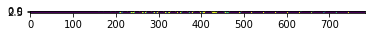

In [6]:
plt.imshow(X_train[:5], interpolation='nearest')
plt.show()

In [7]:
#Let convert our X_train and _X_test to float data type
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
print(X_train.dtype)
print(X_test.dtype)

float32
float32


In [8]:
#It will be good if we NORMALIZE our X_train and X_test by using colour channel of 255 so the range can be between -1 and 1
X_train = X_train/255
X_test = X_test/255
print(X_train.shape[0], 'Sample of Training data(X_train)')
print(X_test.shape[0], 'Sample of Testing data(X_test)')

60000 Sample of Training data(X_train)
10000 Sample of Testing data(X_test)


In [9]:
#since is an image dataset, let convert the class vector i.e y_train and y_test in to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(y_train.dtype)
print(y_test.dtype)
y_train.shape

float32
float32


(60000, 10)

LET BUILD OUR CNN ARCHITECTURE

In [10]:
model = Sequential()
model.add(Dense(N_HIDDEN_1, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
#Hidden layers
model.add(Dense(N_HIDDEN_2))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN_3))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

#for output layer
model.add(Dense(OUTPUT_NEURON))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               150500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [11]:
#let compile our model
model.compile(loss='categorical_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])

#let fit our model with X_train and y_train
model_fit = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=VALIDATION_SPLIT)

#Let score(evaluate) our model using accuracy as metrics which we compile above
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 111us/step - loss: 1.8425 - accuracy: 0.4046 - val_loss: 0.9387 - val_accuracy: 0.8068
Epoch 2/20
48000/48000 [==============================] - 5s 108us/step - loss: 0.9187 - accuracy: 0.7157 - val_loss: 0.4822 - val_accuracy: 0.8731
Epoch 3/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.6512 - accuracy: 0.8009 - val_loss: 0.3771 - val_accuracy: 0.8976
Epoch 4/20
48000/48000 [==============================] - 5s 107us/step - loss: 0.5443 - accuracy: 0.8353 - val_loss: 0.3255 - val_accuracy: 0.9080
Epoch 5/20
48000/48000 [==============================] - 5s 107us/step - loss: 0.4831 - accuracy: 0.8550 - val_loss: 0.2961 - val_accuracy: 0.9139
Epoch 6/20
48000/48000 [==============================] - 5s 109us/step - loss: 0.4398 - accuracy: 0.8702 - val_loss: 0.2726 - val_accuracy: 0.9210
Epoch 7/20
48000/48000 [==============================] - 5s 1

In [12]:
#let print our score for SGD OPIMIZER
print('TEST SCORE SGD Optimizer:',score[0])
print('TEST ACCURACY FOR SGD Optimizer:',score[1])
print('Score is',score)

TEST SCORE SGD Optimizer: 0.15526064120195807
TEST ACCURACY FOR SGD Optimizer: 0.9527000188827515
Score is [0.15526064120195807, 0.9527000188827515]


LET SEE THE TRAININ HISTORY OF OUR MODEL USING SGD OPTIMIZER

In [13]:
# list all data in history
print(model_fit.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


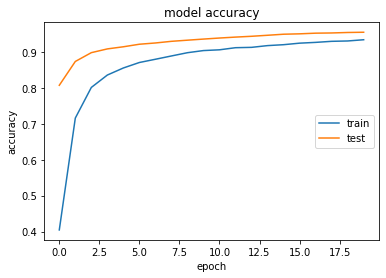

In [14]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

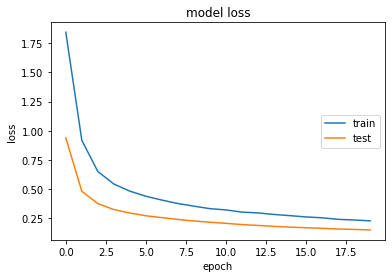

In [15]:
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [16]:
#let compile our model using ADAM OPTIMIZER
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER_2, metrics=['accuracy'])

#let fit our model with X_train and y_train
model_fit_adam = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=VALIDATION_SPLIT)

#Let score(evaluate) our model using accuracy as metrics which we compile above
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 131us/step - loss: 0.2126 - accuracy: 0.9374 - val_loss: 0.1188 - val_accuracy: 0.9644
Epoch 2/20
48000/48000 [==============================] - 6s 129us/step - loss: 0.1442 - accuracy: 0.9572 - val_loss: 0.1060 - val_accuracy: 0.9693
Epoch 3/20
48000/48000 [==============================] - 6s 131us/step - loss: 0.1110 - accuracy: 0.9678 - val_loss: 0.0939 - val_accuracy: 0.9727
Epoch 4/20
48000/48000 [==============================] - 6s 126us/step - loss: 0.0954 - accuracy: 0.9715 - val_loss: 0.0812 - val_accuracy: 0.9747
Epoch 5/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.0831 - val_accuracy: 0.9768
Epoch 6/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.0711 - accuracy: 0.9783 - val_loss: 0.0845 - val_accuracy: 0.9761
Epoch 7/20
48000/48000 [==============================] - 6s 1

In [17]:
#let print our score ADAM OPTIMIZER
print('TEST SCORE FOR ADAM Optimizer:',score[0])
print('TEST ACCURACY FOR ADAM Optimizer:',score[1])
print('Score is',score)

TEST SCORE FOR ADAM Optimizer: 0.07978461757874097
TEST ACCURACY FOR ADAM Optimizer: 0.9825999736785889
Score is [0.07978461757874097, 0.9825999736785889]


LET SEE THE TRAININ HISTORY OF OUR MODEL USING ADAM OPTIMIZER

In [18]:
# list all data in history
print(model_fit_adam.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


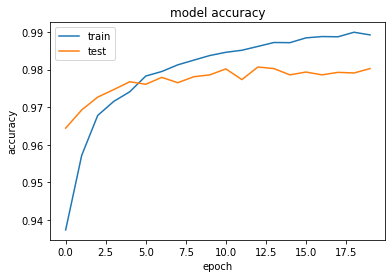

In [19]:
# summarize history for accuracy
plt.plot(model_fit_adam.history['accuracy'])
plt.plot(model_fit_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

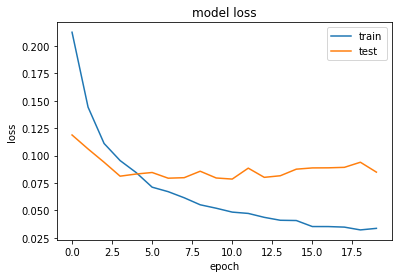

In [20]:
# summarize history for loss
plt.plot(model_fit_adam.history['loss'])
plt.plot(model_fit_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
#let compile our model using RMSprop OPTIMIZER
OPTIMIZER_3 = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER_3, metrics=['accuracy'])

#let fit our model with X_train and y_train
model_fit_RMSprop = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20, validation_split=VALIDATION_SPLIT)

#Let score(evaluate) our model using accuracy as metrics which we compile above
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 122us/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.1222 - val_accuracy: 0.9816
Epoch 2/20
48000/48000 [==============================] - 6s 121us/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.1192 - val_accuracy: 0.9826
Epoch 3/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0254 - accuracy: 0.9934 - val_loss: 0.1295 - val_accuracy: 0.9812
Epoch 4/20
48000/48000 [==============================] - 6s 118us/step - loss: 0.0237 - accuracy: 0.9939 - val_loss: 0.1383 - val_accuracy: 0.9812
Epoch 5/20
48000/48000 [==============================] - 6s 120us/step - loss: 0.0258 - accuracy: 0.9939 - val_loss: 0.1427 - val_accuracy: 0.9821
Epoch 6/20
48000/48000 [==============================] - 6s 121us/step - loss: 0.0257 - accuracy: 0.9941 - val_loss: 0.1449 - val_accuracy: 0.9815
Epoch 7/20
48000/48000 [==============================] - 7s 1

In [22]:
#let print our score RMSprop OPTIMIZER
print('TEST SCORE FOR RMSprop Optimizer:',score[0])
print('TEST ACCURACY FOR RMSprop Optimizer:',score[1])
print('Score is',score)

TEST SCORE FOR RMSprop Optimizer: 0.18142753544931503
TEST ACCURACY FOR RMSprop Optimizer: 0.9815999865531921
Score is [0.18142753544931503, 0.9815999865531921]


LET SEE THE TRAININ HISTORY OF OUR MODEL USING RMSprop OPTIMIZER

In [23]:
# list all data in history
print(model_fit_RMSprop.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


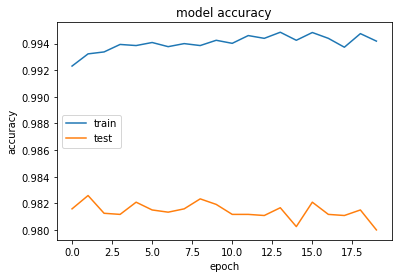

In [24]:
# summarize history for accuracy
plt.plot(model_fit_RMSprop.history['accuracy'])
plt.plot(model_fit_RMSprop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

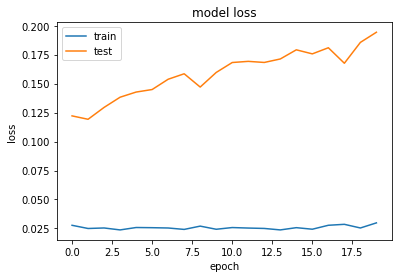

In [25]:
# summarize history for loss
plt.plot(model_fit_RMSprop.history['loss'])
plt.plot(model_fit_RMSprop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()